In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Continue with data exported as csv from credit_default.ipynb

In [3]:
df = pd.read_csv('model_comparison.csv', index_col=False)

In [4]:
df.describe()

,SMOTE,Train Score,Test Score,Train Precision,Test Precision,Train Recall,Test Recall
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.500000,0.820784,0.750406,0.744650,0.497982,0.675453,0.490313
std,0.506061,0.120272,0.076650,0.195200,0.129482,0.242498,0.131530
min,0.000000,0.500713,0.503467,0.217087,0.214373,0.218003,0.212176
25%,0.000000,0.764602,0.689400,0.689216,0.386277,0.485634,0.372514
50%,0.500000,0.823956,0.783000,0.718251,0.509657,0.660682,0.498794
75%,1.000000,0.892001,0.809433,0.916539,0.607787,0.930165,0.589210
max,1.000000,0.999686,0.819867,0.999943,0.701754,0.999829,0.784207


Drop train metrics.

In [6]:
df2 = df.drop(['Train Score', 'Train Precision', 'Train Recall'], axis=1)

Calculate the F1-score.

In [8]:
df2["Test F1"] = 2 * (df2["Test Precision"] * df2["Test Recall"]) / (df2["Test Precision"] + df2["Test Recall"])

df2.head()

,Model,SMOTE,Test Score,Test Precision,Test Recall,Test F1
0,Dummy Classifier 1,0,0.653733,0.214373,0.212176,0.213269
1,XGBoost 1,0,0.807733,0.611740,0.358047,0.451711
2,XGBoost 2,0,0.819467,0.672707,0.358047,0.467349
3,XGBoost 3,0,0.819733,0.679113,0.350814,0.462639
4,XGBoost 4,0,0.819867,0.679487,0.351417,0.463250


Add separate model type column

In [10]:
def model_type(df):
    if 'Dummy' in df['Model']:
        return 'Dummy Classifier'
    if 'KNN' in df['Model']:
        return 'K-Nearest Neighbour'
    if 'Random' in df['Model']:
        return 'Random Forest'
    if 'SVC' in df['Model']:
        return 'Support Vector Machine'
    if 'Logis' in df['Model']:
        return 'Logistic Regression'
    if 'XG' in df['Model']:
        return 'XGBoost'
    else:
        return 'Other'

df2 = df2.copy()
df2['Model Type'] = df2.apply(model_type, axis=1)

df2['Model Type'].value_counts()

Model Type
XGBoost                   17
Logistic Regression       10
Random Forest              6
K-Nearest Neighbour        5
Dummy Classifier           2
Support Vector Machine     2
Name: count, dtype: int64

Add SMOTE if appropiate to string in 'Model Type' column.

In [12]:
df2["Model Type"] = df2.apply(lambda row: f"{row['Model Type']} (SMOTE)" if row["SMOTE"] == 1 else row["Model Type"], axis=1)

df2['Model Type'].value_counts()

Model Type
XGBoost (SMOTE)                   9
XGBoost                           8
Logistic Regression               5
Logistic Regression (SMOTE)       5
Random Forest                     3
K-Nearest Neighbour               3
Random Forest (SMOTE)             3
K-Nearest Neighbour (SMOTE)       2
Dummy Classifier                  1
Support Vector Machine            1
Dummy Classifier (SMOTE)          1
Support Vector Machine (SMOTE)    1
Name: count, dtype: int64

Add a second 'Model Type' column for unique data/chart splitting.

In [14]:
def model_type(df):
    if 'Dummy' in df['Model']:
        return 'Dummy Classifier'
    if 'KNN' in df['Model']:
        return 'K-Nearest Neighbour'
    if 'Random' in df['Model']:
        return 'Random Forest'
    if 'SVC' in df['Model']:
        return 'Support Vector Machine'
    if 'Logis' in df['Model']:
        return 'Logistic Regression'
    if 'XG' in df['Model']:
        return 'XGBoost'
    else:
        return 'Other'

df2 = df2.copy()
df2['Model Type2'] = df2.apply(model_type, axis=1)

df2['Model Type2'].value_counts()

Model Type2
XGBoost                   17
Logistic Regression       10
Random Forest              6
K-Nearest Neighbour        5
Dummy Classifier           2
Support Vector Machine     2
Name: count, dtype: int64

Choose the best model based on the highest F1-score and recall per model category.

In [16]:
df_temp = df2[df2['Test Recall'] > df2['Test Precision']]

df3 = df_temp.loc[df_temp.groupby('Model Type2')['Test F1'].idxmax()].reset_index(drop=True)

df3

,Model,SMOTE,Test Score,Test Precision,Test Recall,Test F1,Model Type,Model Type2
0,Dummy Classifier 2,1,0.503467,0.227501,0.519590,0.316446,Dummy Classifier (SMOTE),Dummy Classifier
1,KNN 4,1,0.660133,0.348019,0.614225,0.444299,K-Nearest Neighbour (SMOTE),K-Nearest Neighbour
2,Logistic Regression 2,0,0.773067,0.488167,0.534659,0.510357,Logistic Regression,Logistic Regression
3,SVC 2,1,0.774267,0.491201,0.572031,0.528544,Support Vector Machine (SMOTE),Support Vector Machine
4,XGBoost 5,0,0.784267,0.511307,0.558770,0.533986,XGBoost,XGBoost


Random Forest was excluded as the recall is less than the precision. Needs to be manually added back to the final dataframe. Based on best F1 score instead.

In [18]:
df_rf = df2[df2['Model Type2'] == 'Random Forest']

max_rf_f1 = df_rf['Test F1'].idxmax()
df_temp2 = df_rf.loc[[max_rf_f1]]

df_temp2

,Model,SMOTE,Test Score,Test Precision,Test Recall,Test F1,Model Type,Model Type2
32,Random Forest 5,1,0.790267,0.527529,0.496685,0.511642,Random Forest (SMOTE),Random Forest


Combine the two databases.

In [20]:
dfs = [df3, df_temp2]

df4 = pd.concat(dfs, ignore_index=True)

df4

,Model,SMOTE,Test Score,Test Precision,Test Recall,Test F1,Model Type,Model Type2
0,Dummy Classifier 2,1,0.503467,0.227501,0.519590,0.316446,Dummy Classifier (SMOTE),Dummy Classifier
1,KNN 4,1,0.660133,0.348019,0.614225,0.444299,K-Nearest Neighbour (SMOTE),K-Nearest Neighbour
2,Logistic Regression 2,0,0.773067,0.488167,0.534659,0.510357,Logistic Regression,Logistic Regression
3,SVC 2,1,0.774267,0.491201,0.572031,0.528544,Support Vector Machine (SMOTE),Support Vector Machine
4,XGBoost 5,0,0.784267,0.511307,0.558770,0.533986,XGBoost,XGBoost
5,Random Forest 5,1,0.790267,0.527529,0.496685,0.511642,Random Forest (SMOTE),Random Forest


Rename the metrics without 'Test'.

In [22]:
df5 = df4.rename(columns={
    'Test Score': 'Accuracy',
    'Test Precision': 'Precision',
    'Test Recall': 'Recall',
    'Test F1': 'F1-score'
})

df5.columns

Index(['Model', 'SMOTE', 'Accuracy', 'Precision', 'Recall', 'F1-score',
       'Model Type', 'Model Type2'],
      dtype='object')

Plot with the metrics on x-axis and model type in the legend.

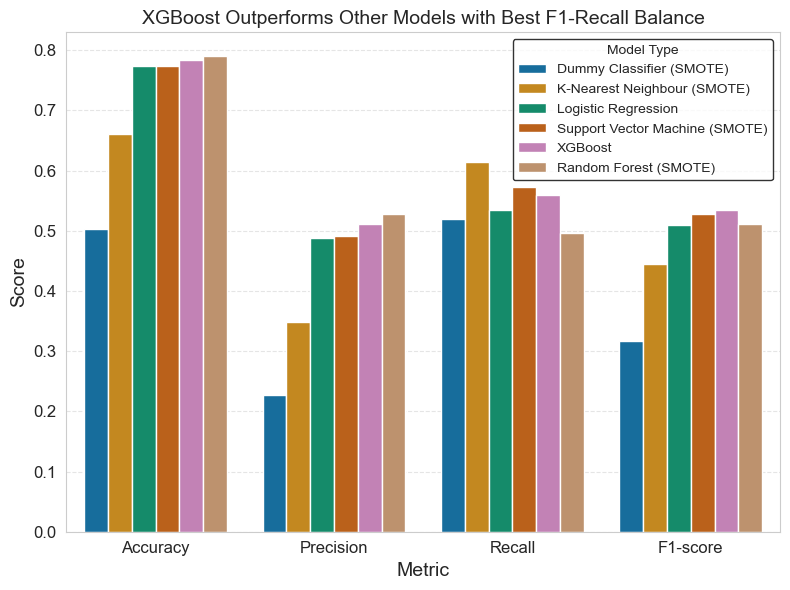

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

df_long = df5.melt(id_vars='Model Type', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(x='Metric', y='Score', hue='Model Type', data=df_long, palette='colorblind')

plt.title("XGBoost Outperforms Other Models with Best F1-Recall Balance", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right', title='Model Type', frameon=True, facecolor='white', edgecolor='black')
plt.tight_layout()
# plt.savefig('xgb_model_comparison_bar.png', dpi=300, bbox_inches='tight')
plt.show()


Version with Dummy Classifier without SMOTE

In [26]:
df_temp3 = df2.loc[[0]]

df_temp3

,Model,SMOTE,Test Score,Test Precision,Test Recall,Test F1,Model Type,Model Type2
0,Dummy Classifier 1,0,0.653733,0.214373,0.212176,0.213269,Dummy Classifier,Dummy Classifier


In [27]:
dfs2 = [df4, df_temp3]

df6 = pd.concat(dfs2, ignore_index=True)

df7 = df6.rename(columns={
    'Test Score': 'Accuracy',
    'Test Precision': 'Precision',
    'Test Recall': 'Recall',
    'Test F1': 'F1-score'
})

df7.sort_values('Model Type')

,Model,SMOTE,Accuracy,Precision,Recall,F1-score,Model Type,Model Type2
6,Dummy Classifier 1,0,0.653733,0.214373,0.212176,0.213269,Dummy Classifier,Dummy Classifier
0,Dummy Classifier 2,1,0.503467,0.227501,0.519590,0.316446,Dummy Classifier (SMOTE),Dummy Classifier
1,KNN 4,1,0.660133,0.348019,0.614225,0.444299,K-Nearest Neighbour (SMOTE),K-Nearest Neighbour
2,Logistic Regression 2,0,0.773067,0.488167,0.534659,0.510357,Logistic Regression,Logistic Regression
5,Random Forest 5,1,0.790267,0.527529,0.496685,0.511642,Random Forest (SMOTE),Random Forest
3,SVC 2,1,0.774267,0.491201,0.572031,0.528544,Support Vector Machine (SMOTE),Support Vector Machine
4,XGBoost 5,0,0.784267,0.511307,0.558770,0.533986,XGBoost,XGBoost


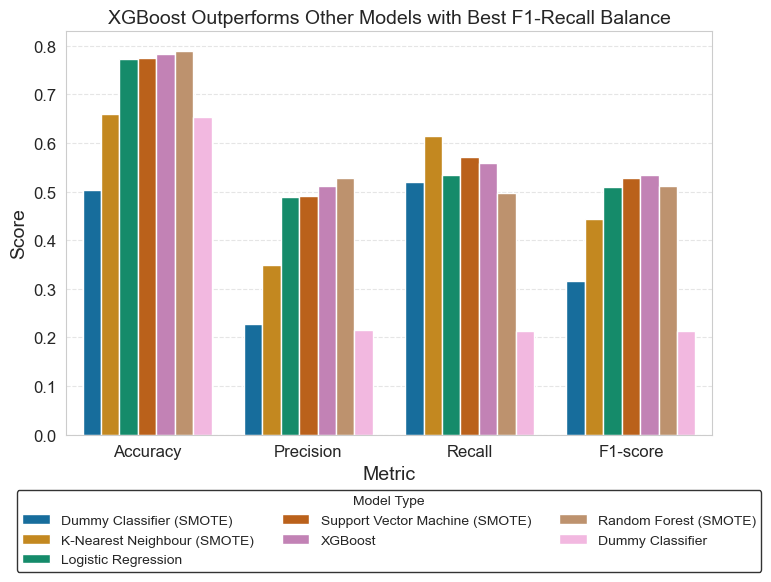

In [28]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

df_long = df7.melt(id_vars='Model Type', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(x='Metric', y='Score', hue='Model Type', data=df_long, palette='colorblind')

plt.title("XGBoost Outperforms Other Models with Best F1-Recall Balance", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), title='Model Type', frameon=True, facecolor='white', edgecolor='black', ncol=3)
plt.tight_layout()
plt.savefig('xgb_model_comparison_bar.png', dpi=300, bbox_inches='tight')
plt.show()